# Badanie ilości uczenia 

In [4]:
import import_ipynb
import basic_create_model_function as al 
import matplotlib.pyplot as plt
import numpy
import pandas as pd


Uwagi: Testt wykonują sie kilkanascie minut !!!

In [2]:
val_loss, val_acc,loss,acc, training_time = al.create_model_with_history_for_all_epochs(epochs = 100,verbose  = 0)

Trenuję: 


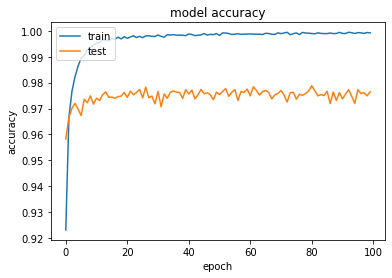

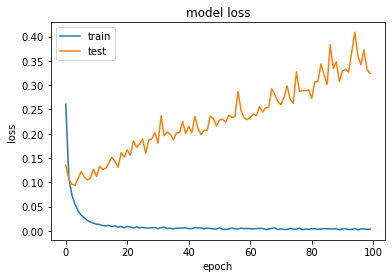

In [19]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Wnioski: 
Z powyszych wykresu wynika, że ilość powtórzeń uczenia wystarczy około 10, ponieważ wieksza ilość testowanie nie zwieksza dokładność danych testowanie oraz trenigowych ale za zwieksza się koszt danych testowych. 
Również z wykresu model loss wynika,że od pewnej ilości epoch zwieksza się strata dla danych testowych, zatem przy projektowanie sieci neuronowej trzeba znależć odpowiednią epoch przy którym loss jest najmniejsza dla danych testowych.
  


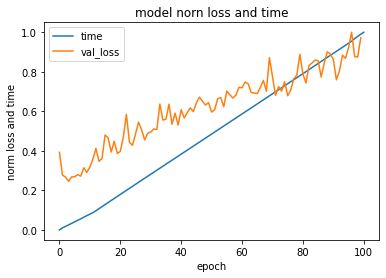

In [13]:
# summarize history time
summarize_time = list()
summarize_time.append(0)

for i in training_time: 
    last = summarize_time[-1] + i
    summarize_time.append(last)
# norm = [float(i)/sum(summarize_time) for i in summarize_time]
norm = [float(i)/max(summarize_time) for i in summarize_time]
norm_loss = [float(i)/max(val_loss) for i in val_loss]
plt.plot(norm)
plt.plot(norm_loss)
plt.title('model norn loss and time')
plt.ylabel('norm loss and time')
plt.xlabel('epoch')
plt.legend(['time', 'val_loss'], loc='upper left')
plt.show()



Wykresu powyżej wynika, że złożność algorytmy (uczenia sieci neuraonowej) jest liniowa i zależy od ilości uczenia się (epochs). Również widać, że val_lost ogolnie wzrasta liniowo zależności od ilości epochs ale to bardzo zależy od próby.   

In [5]:
val_loss_pd = pd.DataFrame()
val_acc_pd = pd.DataFrame()
loss_mean_pd = pd.DataFrame()
acc_mean_pd = pd.DataFrame()


for i  in range(0,10):
    print(i)
    val_loss_pd[i], val_acc_pd[i],loss_mean_pd[i],acc_mean_pd[i], training_time =  al.create_model_with_history_for_all_epochs(epochs = 20,verbose  = 0)



0
Trenuję: 
1
Trenuję: 
2
Trenuję: 
3
Trenuję: 
4
Trenuję: 
5
Trenuję: 
6
Trenuję: 
7
Trenuję: 
8
Trenuję: 
9
Trenuję: 


<bound method NDFrame.head of          0       1       2       3       4       5       6       7       8  \
0   0.9586  0.9581  0.9562  0.9586  0.9581  0.9590  0.9599  0.9618  0.9583   
1   0.9660  0.9718  0.9677  0.9658  0.9657  0.9687  0.9664  0.9689  0.9678   
2   0.9709  0.9736  0.9711  0.9698  0.9737  0.9730  0.9725  0.9712  0.9678   
3   0.9713  0.9730  0.9714  0.9733  0.9703  0.9738  0.9734  0.9744  0.9725   
4   0.9748  0.9745  0.9755  0.9741  0.9741  0.9729  0.9753  0.9750  0.9746   
5   0.9727  0.9767  0.9723  0.9741  0.9698  0.9721  0.9753  0.9728  0.9745   
6   0.9773  0.9717  0.9721  0.9746  0.9734  0.9708  0.9718  0.9731  0.9713   
7   0.9701  0.9759  0.9737  0.9722  0.9743  0.9736  0.9766  0.9725  0.9725   
8   0.9769  0.9751  0.9704  0.9760  0.9762  0.9761  0.9727  0.9749  0.9755   
9   0.9734  0.9741  0.9741  0.9768  0.9752  0.9710  0.9771  0.9745  0.9761   
10  0.9714  0.9754  0.9716  0.9731  0.9741  0.9762  0.9769  0.9731  0.9784   
11  0.9761  0.9787  0.9722  0.9745

0     0.922560
1     0.966720
2     0.977078
3     0.982775
4     0.986720
5     0.989330
6     0.991518
7     0.992708
8     0.993723
9     0.994755
10    0.995207
11    0.995632
12    0.996238
13    0.996425
14    0.996613
15    0.996652
16    0.996972
17    0.997125
18    0.997295
19    0.997360
dtype: float64


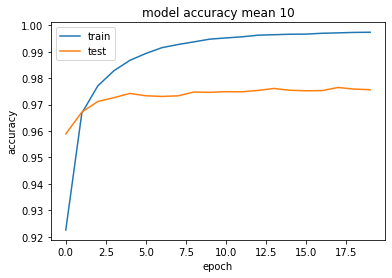

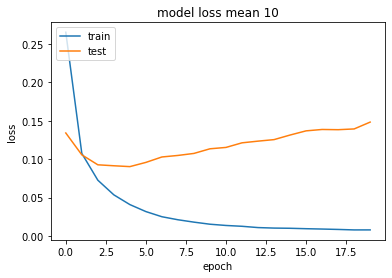

In [13]:


def Average(df = pd.DataFrame()): 
    df_T = df.T
    return  df_T.mean(axis = 0) 

val_loss_mean = Average(val_loss_pd)
val_acc_mean = Average(val_acc_pd)
loss_mean = Average(loss_mean_pd)
acc_mean = Average(acc_mean_pd)

print(acc_mean)

plt.plot(acc_mean)
plt.plot(val_acc_mean)
plt.title('model accuracy mean 10')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss_mean)
plt.plot(val_loss_mean)
plt.title('model loss mean 10')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Dla stworzonej sieci, najlpesza ilość uczenia jest 5, ponieważ dla tej wartości osiaga najlepsze wartości accurancy oraz loss. Wynik poszczegolnego uczenia bardzo zalezy od doboru zbioru testujacego dlatego w powyszym przykładzie biore średnia z 10 pomiarów dla każdego epoch.
